# TASK 1 : GOOGLE STOCK PRICE PREDICTION

## 1 : Importing necessary Libraries

In [2]:
#importing libraries to be used
import numpy as np # for linear algebra
import pandas as pd # data preprocessing
import matplotlib.pyplot as plt # data visualization library
import seaborn as sns # data visualization library
%matplotlib inline # ignore warnings

from sklearn.preprocessing import MinMaxScaler # for normalization
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, Bidirectional

In [ ]:
#Importing the data

In [16]:
df = pd.read_csv('googlestock.csv')
df.head(15)

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,GOOG,2016-06-14 00:00:00+00:00,718.27,722.4700,713.1200,716.48,1306065,718.27,722.4700,713.1200,716.48,1306065,0.0,1.0
1,GOOG,2016-06-15 00:00:00+00:00,718.92,722.9800,717.3100,719.00,1214517,718.92,722.9800,717.3100,719.00,1214517,0.0,1.0
2,GOOG,2016-06-16 00:00:00+00:00,710.36,716.6500,703.2600,714.91,1982471,710.36,716.6500,703.2600,714.91,1982471,0.0,1.0
3,GOOG,2016-06-17 00:00:00+00:00,691.72,708.8200,688.4515,708.65,3402357,691.72,708.8200,688.4515,708.65,3402357,0.0,1.0
4,GOOG,2016-06-20 00:00:00+00:00,693.71,702.4800,693.4100,698.77,2082538,693.71,702.4800,693.4100,698.77,2082538,0.0,1.0
5,GOOG,2016-06-21 00:00:00+00:00,695.94,702.7700,692.0100,698.40,1465634,695.94,702.7700,692.0100,698.40,1465634,0.0,1.0
6,GOOG,2016-06-22 00:00:00+00:00,697.46,700.8600,693.0819,699.06,1184318,697.46,700.8600,693.0819,699.06,1184318,0.0,1.0
7,GOOG,2016-06-23 00:00:00+00:00,701.87,701.9500,687.0000,697.45,2171415,701.87,701.9500,687.0000,697.45,2171415,0.0,1.0
8,GOOG,2016-06-24 00:00:00+00:00,675.22,689.4000,673.4500,675.17,4449022,675.22,689.4000,673.4500,675.17,4449022,0.0,1.0
9,GOOG,2016-06-27 00:00:00+00:00,668.26,672.3000,663.2840,671.00,2641085,668.26,672.3000,663.2840,671.00,2641085,0.0,1.0


## 2 : Getting the statistical Data

In [5]:
# shape of data
print("Shape of data:",df.shape)

Shape of data: (1258, 14)


In [13]:
# statistical description of data
df.describe()

,open,close
count,1258.000000,1258.000000
mean,1215.260779,1216.317067
std,382.446995,383.333358
min,671.000000,668.260000
25%,959.005000,960.802500
50%,1131.150000,1132.460000
75%,1361.075000,1360.595000
max,2524.920000,2521.600000


In [7]:
# summary of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   symbol       1258 non-null   object 
 1   date         1258 non-null   object 
 2   close        1258 non-null   float64
 3   high         1258 non-null   float64
 4   low          1258 non-null   float64
 5   open         1258 non-null   float64
 6   volume       1258 non-null   int64  
 7   adjClose     1258 non-null   float64
 8   adjHigh      1258 non-null   float64
 9   adjLow       1258 non-null   float64
 10  adjOpen      1258 non-null   float64
 11  adjVolume    1258 non-null   int64  
 12  divCash      1258 non-null   float64
 13  splitFactor  1258 non-null   float64
dtypes: float64(10), int64(2), object(2)
memory usage: 137.7+ KB


##3. Checking the null Values

In [8]:
# checking null values
df.isnull().sum()

symbol         0
date           0
close          0
high           0
low            0
open           0
volume         0
adjClose       0
adjHigh        0
adjLow         0
adjOpen        0
adjVolume      0
divCash        0
splitFactor    0
dtype: int64

### There are no null values in the dataset

In [17]:
df = df[['date','open','close']]
df['date'] = pd.to_datetime(df['date'].apply(lambda x: x.split()[0]))
df.set_index('date',drop=True,inplace=True)
df.head(10)

,open,close
date,,
2016-06-14,716.48,718.27
2016-06-15,719.00,718.92
2016-06-16,714.91,710.36
2016-06-17,708.65,691.72
2016-06-20,698.77,693.71
2016-06-21,698.40,695.94
2016-06-22,699.06,697.46
2016-06-23,697.45,701.87
2016-06-24,675.17,675.22


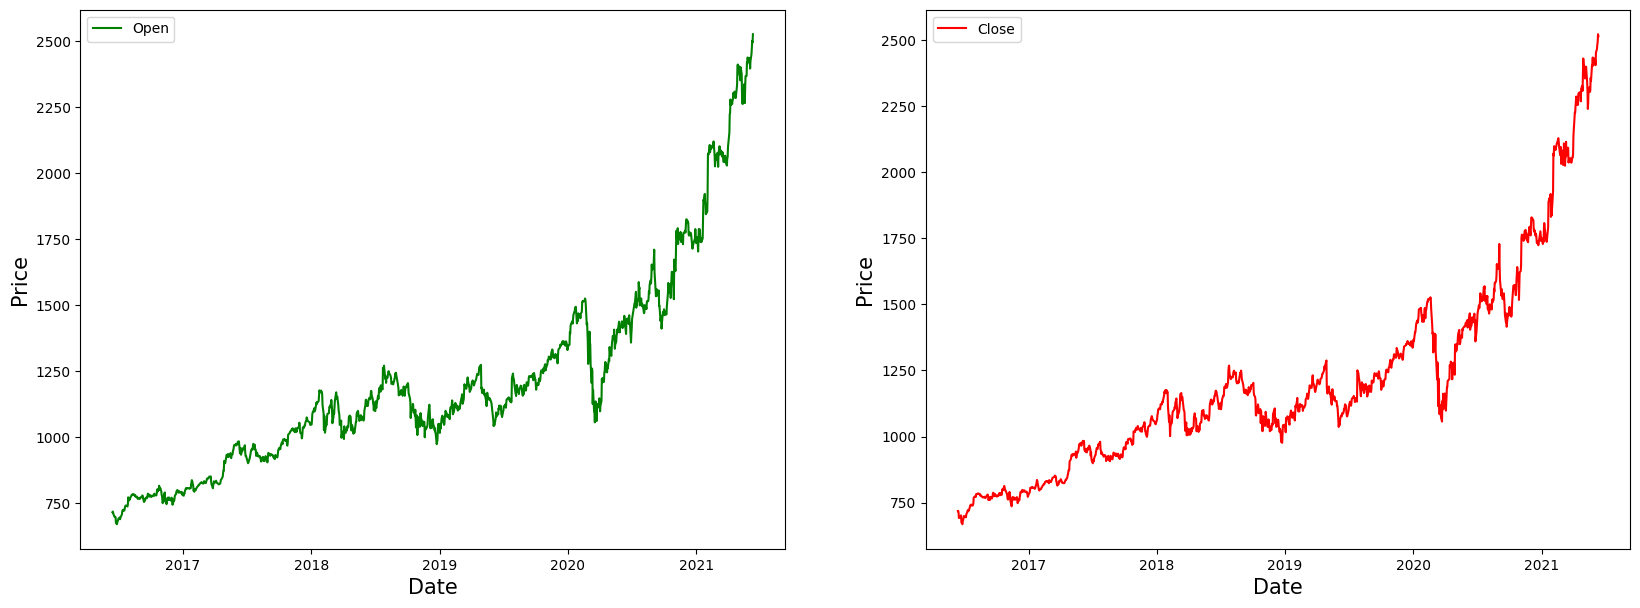

In [19]:
# plotting open and closing price on date index
fig, ax =plt.subplots(1,2,figsize=(20,7))
ax[0].plot(df['open'],label='Open',color='green')
ax[0].set_xlabel('Date',size=15)
ax[0].set_ylabel('Price',size=15)
ax[0].legend()

ax[1].plot(df['close'],label='Close',color='red')
ax[1].set_xlabel('Date',size=15)
ax[1].set_ylabel('Price',size=15)
ax[1].legend()

fig.show()

## 4 : Data Preprocessing

In [20]:
# normalizing all the values of all columns using MinMaxScaler
MMS = MinMaxScaler()
df[df.columns] = MMS.fit_transform(df)
df.head(10)

,open,close
date,,
2016-06-14,0.024532,0.026984
2016-06-15,0.025891,0.027334
2016-06-16,0.023685,0.022716
2016-06-17,0.020308,0.012658
2016-06-20,0.014979,0.013732
2016-06-21,0.014779,0.014935
2016-06-22,0.015135,0.015755
2016-06-23,0.014267,0.018135
2016-06-24,0.002249,0.003755


In [21]:
# splitting the data into training and test set [75% for training and remaining for testing]
training_size = round(len(df) * 0.75)
training_size

944

In [22]:
train_data = df[:training_size]
test_data  = df[training_size:]

train_data.shape, test_data.shape

((944, 2), (314, 2))

In [24]:
# Function to create sequence of data for training and testing

def create_sequence(dataset):
  sequences = []
  labels = []

  start_idx = 0
# Selecting 50 rows at a time
  for stop_idx in range(50,len(dataset)):
    sequences.append(dataset.iloc[start_idx:stop_idx])
    labels.append(dataset.iloc[stop_idx])
    start_idx += 1
  return (np.array(sequences),np.array(labels))

In [25]:
train_seq, train_label = create_sequence(train_data)
test_seq, test_label = create_sequence(test_data)
train_seq.shape, train_label.shape, test_seq.shape, test_label.shape

((894, 50, 2), (894, 2), (264, 50, 2), (264, 2))

## 5:  Creating LSTM model

In [120]:
# imported Sequential from keras.models
model = Sequential()
# importing Dense, Dropout, LSTM, Bidirectional from keras.layers
model.add(LSTM(units=50, return_sequences=True, input_shape = (train_seq.shape[1], train_seq.shape[2])))

model.add(Dropout(0.1))
model.add(LSTM(units=50))

model.add(Dense(2))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 50, 50)            10600     
                                                                 
 dropout_1 (Dropout)         (None, 50, 50)            0         
                                                                 
 lstm_3 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 2)                 102       
                                                                 
Total params: 30902 (120.71 KB)
Trainable params: 30902 (120.71 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
#Training the data

In [123]:
# fitting the model by iterating the dataset over 120 times(120 epochs)
model.fit(train_seq, train_label, epochs=120,validation_data=(test_seq, test_label), verbose=1)

Epoch 1/120
28/28 [==============================] - 1s 31ms/step - loss: 3.4747e-04 - mean_absolute_error: 0.0139 - val_loss: 0.0032 - val_mean_absolute_error: 0.0431
Epoch 2/120
28/28 [==============================] - 1s 36ms/step - loss: 3.3267e-04 - mean_absolute_error: 0.0134 - val_loss: 0.0040 - val_mean_absolute_error: 0.0501
Epoch 3/120
28/28 [==============================] - 1s 43ms/step - loss: 3.1890e-04 - mean_absolute_error: 0.0131 - val_loss: 0.0041 - val_mean_absolute_error: 0.0501
Epoch 4/120
28/28 [==============================] - 1s 41ms/step - loss: 3.2191e-04 - mean_absolute_error: 0.0133 - val_loss: 0.0060 - val_mean_absolute_error: 0.0626
Epoch 5/120
28/28 [==============================] - 1s 32ms/step - loss: 2.9879e-04 - mean_absolute_error: 0.0126 - val_loss: 0.0057 - val_mean_absolute_error: 0.0609
Epoch 6/120
28/28 [==============================] - 1s 32ms/step - loss: 3.2047e-04 - mean_absolute_error: 0.0131 - val_loss: 0.0052 - val_mean_absolute_error:

In [ ]:
#Testing the data

In [124]:
# predicting the values after running the model
test_predicted = model.predict(test_seq)
test_predicted[:5]

9/9 [==============================] - 1s 10ms/step


array([[0.39648214, 0.39232665],
       [0.39204186, 0.38789627],
       [0.38843942, 0.3844242 ],
       [0.39709473, 0.39307502],
       [0.39824107, 0.39419112]], dtype=float32)

In [125]:
# normalization on predicted or Tested data
test_inverse_predicted = MMS.inverse_transform(test_predicted)
test_inverse_predicted[:5]

array([[1406.0461, 1395.3748],
       [1397.8142, 1387.1637],
       [1391.1356, 1380.7288],
       [1407.1819, 1396.7616],
       [1409.307 , 1398.8302]], dtype=float32)

## 6. Data Visuvalisation between actual & Predicted Data

In [126]:
# Merging actual and predicted data for better visualization
df_merge = pd.concat([df.iloc[-264:].copy(),
                      pd.DataFrame(test_inverse_predicted,
                                   columns=['open_predicted','close_predicted'],
                                       index=df.iloc[-264:].index)], axis=1)

In [127]:
# Inversing normalized data
df_merge[['open','close']] = MMS.inverse_transform(df_merge[['open','close']])
df_merge.head()

,open,close,open_predicted,close_predicted
date,,,,
2020-05-27,1417.25,1417.84,1406.046143,1395.374756
2020-05-28,1396.86,1416.73,1397.814209,1387.163696
2020-05-29,1416.94,1428.92,1391.135620,1380.728760
2020-06-01,1418.39,1431.82,1407.181885,1396.761597
2020-06-02,1430.55,1439.22,1409.307007,1398.830200


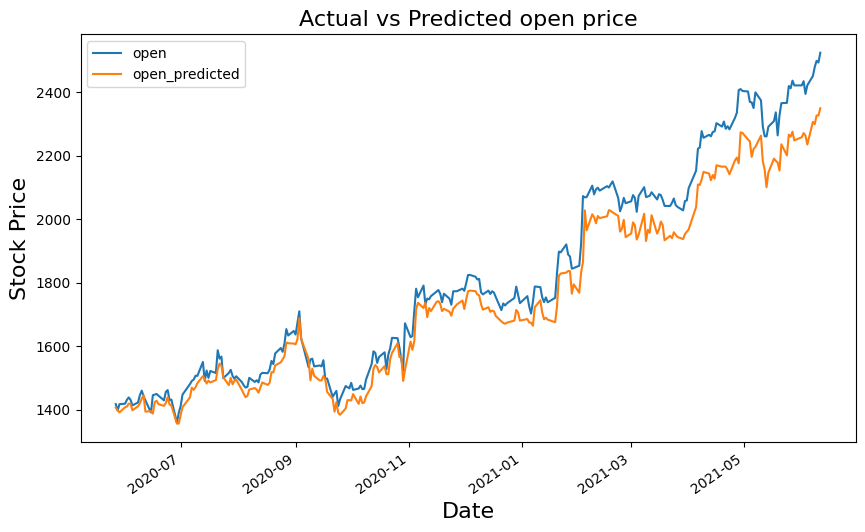

In [128]:
# plotting the actual open and predicted open prices on date index
df_merge[['open','open_predicted']].plot(figsize=(10,6))
plt.xticks(rotation=35)
plt.xlabel('Date',size=16)
plt.ylabel('Stock Price',size=16)
plt.title('Actual vs Predicted open price',size=16)
plt.show()

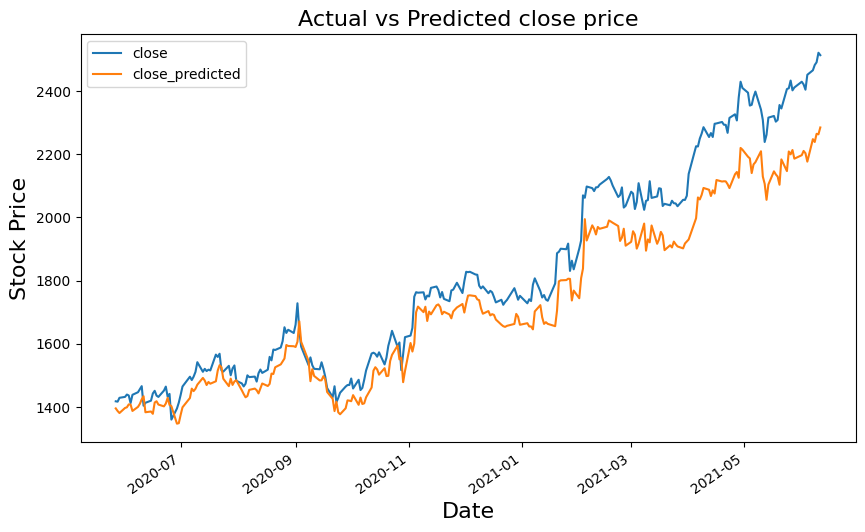

In [129]:
# plotting the actual close and predicted close prices on date index
df_merge[['close','close_predicted']].plot(figsize=(10,6))
plt.xticks(rotation=35)
plt.xlabel('Date',size=16)
plt.ylabel('Stock Price',size=16)
plt.title('Actual vs Predicted close price',size=16)
plt.show()

## 7. Predicting for upcoming 5 days

In [130]:
# Creating a dataframe and adding 10 days to existing index

df_merge = df_merge.append(pd.DataFrame(columns=df_merge.columns,
                                        index=pd.date_range(start=df_merge.index[-1], periods=11, freq='D', closed='right')))
df_merge['2021-06-09':'2021-06-16']

,open,close,open_predicted,close_predicted
2021-06-09,2499.50,2491.40,2327.205566,2264.871582
2021-06-10,2494.01,2521.60,2327.094727,2263.306641
2021-06-11,2524.92,2513.93,2350.053955,2284.985107
2021-06-12,NaN,NaN,NaN,NaN
2021-06-13,NaN,NaN,NaN,NaN
2021-06-14,NaN,NaN,NaN,NaN
2021-06-15,NaN,NaN,NaN,NaN
2021-06-16,NaN,NaN,NaN,NaN


In [131]:
# creating a DataFrame and filling values of open and close column
upcoming_prediction = pd.DataFrame(columns=['open','close'],index=df_merge.index)
upcoming_prediction.index=pd.to_datetime(upcoming_prediction.index)

In [132]:
curr_seq = test_seq[-1:]

for i in range(-10,0):
  up_pred = model.predict(curr_seq)
  upcoming_prediction.iloc[i] = up_pred
  curr_seq = np.append(curr_seq[0][1:],up_pred,axis=0)
  curr_seq = curr_seq.reshape(test_seq[-1:].shape)

1/1 [==============================] - 0s 16ms/step


In [133]:
# inversing Normalization/scaling
upcoming_prediction[['open','close']] = MMS.inverse_transform(upcoming_prediction[['open','close']])

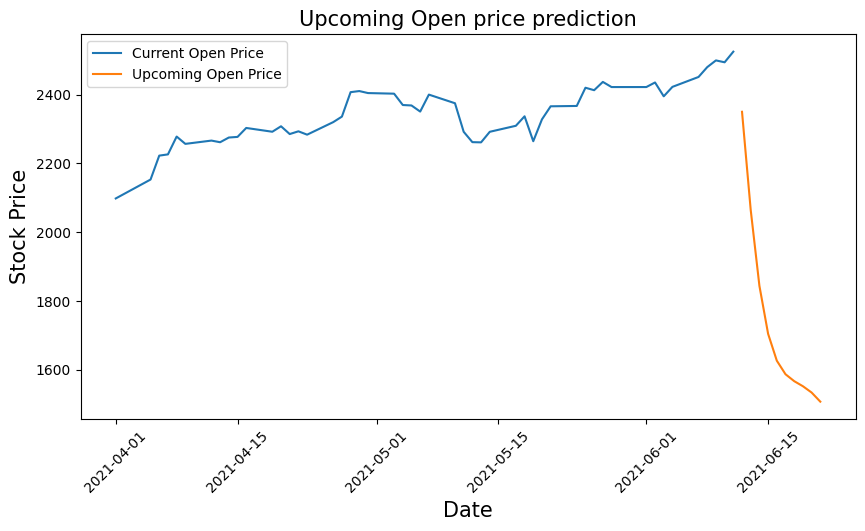

In [134]:
# plotting Upcoming Open price on date index
fig,ax=plt.subplots(figsize=(10,5))
ax.plot(df_merge.loc['2021-04-01':,'open'],label='Current Open Price')
ax.plot(upcoming_prediction.loc['2021-04-01':,'open'],label='Upcoming Open Price')
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)
ax.set_xlabel('Date',size=15)
ax.set_ylabel('Stock Price',size=15)
ax.set_title('Upcoming Open price prediction',size=15)
ax.legend()
fig.show()

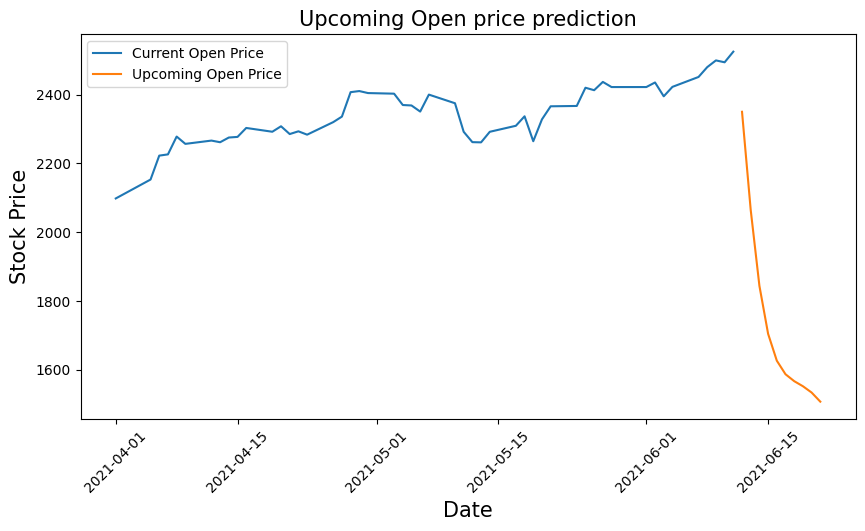

In [135]:
# plotting Upcoming Open price on date index
fig,ax=plt.subplots(figsize=(10,5))
ax.plot(df_merge.loc['2021-04-01':,'open'],label='Current Open Price')
ax.plot(upcoming_prediction.loc['2021-04-01':,'open'],label='Upcoming Open Price')
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)
ax.set_xlabel('Date',size=15)
ax.set_ylabel('Stock Price',size=15)
ax.set_title('Upcoming Open price prediction',size=15)
ax.legend()
fig.show()